Social network advertising, also social media targeting, is a group of terms that are used to describe forms of online advertising/digital marketing that focus on social networking services. One of the major benefits of this type of advertising is that advertisers can take advantage of the users' demographic information and target their ads appropriately.

Social media targeting combines current targeting options (such as geotargeting, behavioral targeting, socio-psychographic targeting, etc.), to make detailed target group identification possible. With social media targeting, advertisements are distributed to users based on information gathered from target group profiles.

Social network advertising is not necessarily the same as social media targeting. Social media targeting is a method of optimizing social media advertising by using profile data to deliver advertisements directly to individual users. Social network advertising refers to the process of matching social network users to target groups that have been specified by the advertiser. Social media advertising involves creating content on social media platforms, engaging with followers, and running social media advertisements.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Social_network_advertising)

For this assignment, we will take a look at how Social Network pick who to advertise using k-Nearest Neighbor algorithm. We will leverage the [Social Network Ads dataset](https://www.kaggle.com/rakeshrau/social-network-ads).

First, let's import the data

# Learning Objectives
- Define basic terminology of machine learning.
- Describe a typical machine learning modeling process.
- Demonstrate the ability to use K-Nearest Neighbor algorithm.
- Demonstrate the ability to tweak K-Nearest Neighbor algorithm.
- Demonstrate the ability to determine the accuracy of a model.

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

SNA = pd.read_csv('./Social_Network_Ads.csv')

Question 1: Print the top 10 rows of the dataset

In [2]:
display(SNA.head(10))

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


Question 1.2: Drop the User Id column from the SNA dataframe using [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method

In [3]:
SNA.drop('User ID', axis=1, inplace=True)
display(SNA.head())

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Question 2.1: Within the Gender column, replace the text Male and Female with 0 and 1 respectively. You can use [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method.

In [4]:
# Used map function instead of replace to use numeric 1's and 0's instead of string '1' and '0'
SNA['Gender'] = SNA['Gender'].map({'Female': 1, 'Male': 0})

Question 2.2: Check if successful by printing top 10 rows

In [5]:
display(SNA.head(10))

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
5,0,27,58000,0
6,1,27,84000,0
7,1,32,150000,1
8,0,25,33000,0
9,1,35,65000,0


As part of any machine learning problem, we need to explore the data and perform exploratory data analysis. For the next set of questions, we will be using [seaborn](https://seaborn.pydata.org/index.html) library for visualization.

Question 3.1: Using Seaboard [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), create three pairwise scatter plots using Purchased column as hue for the following pairs:
1. Age & EstimatedSalary
2. Age & Gender
3. Gender & EstimatedSalary

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

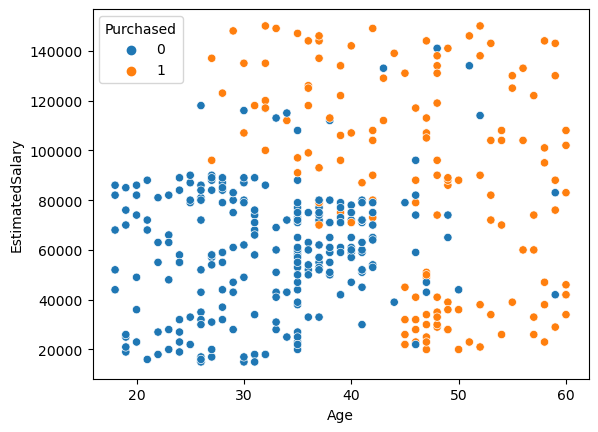

In [6]:
import seaborn as sns
sns.scatterplot(data=SNA, x="Age", y="EstimatedSalary", hue="Purchased")

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

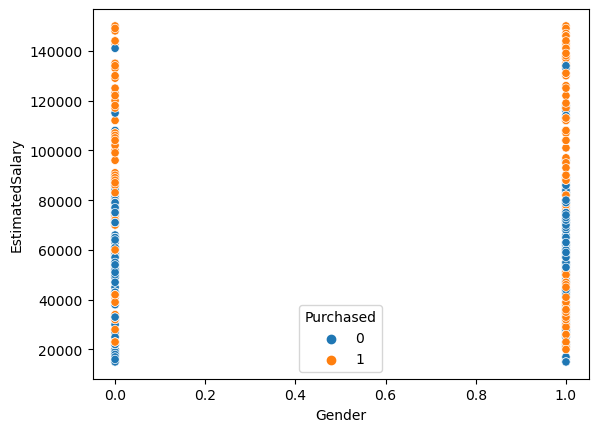

In [7]:
sns.scatterplot(data=SNA, x="Gender", y="EstimatedSalary", hue="Purchased")

<AxesSubplot:xlabel='Age', ylabel='Gender'>

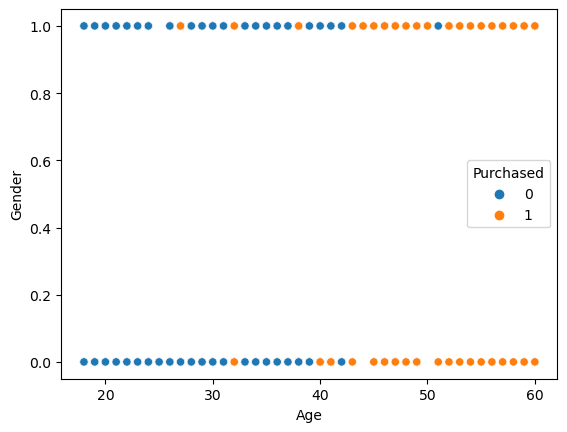

In [8]:
sns.scatterplot(data=SNA, x="Gender", y="Age", hue="Purchased")

Question 3.2: Based on the above plots, which feature(s) can be best used to determine if a person will purchase an item based on Ad? 

Age & EstimatedSalary

Question 3.3: Use histogram plots to validate your answer. Set the Hue to be 'Purchased'

<AxesSubplot:xlabel='Age', ylabel='Gender'>

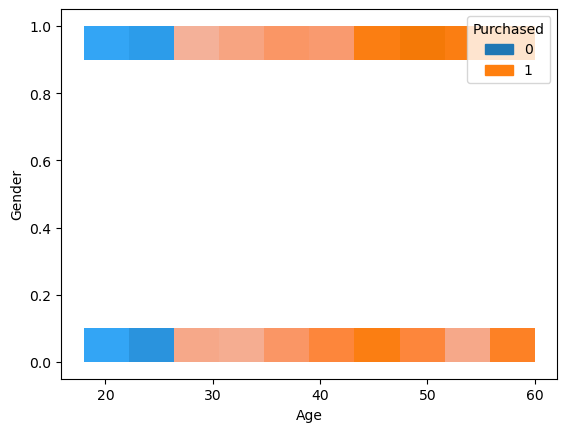

In [9]:
sns.histplot(data=SNA, x="Gender", y="Age", hue="Purchased")

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

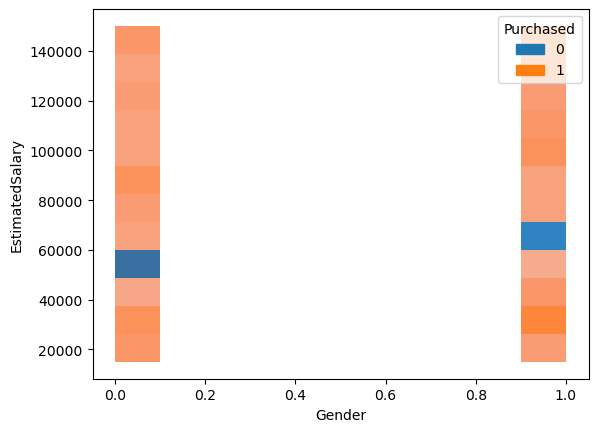

In [10]:
sns.histplot(data=SNA, x="Gender", y="EstimatedSalary", hue="Purchased")

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

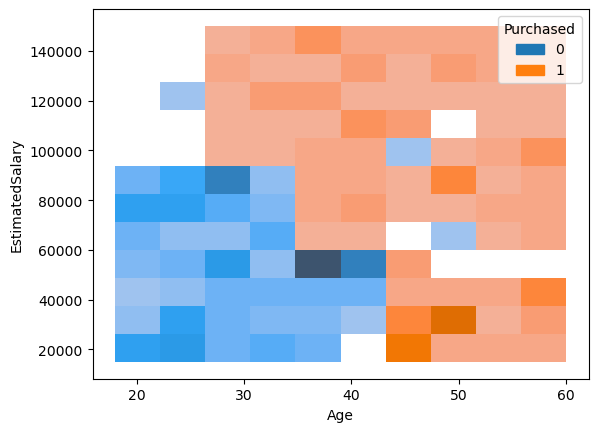

In [11]:
sns.histplot(data=SNA, x="Age", y="EstimatedSalary", hue="Purchased")

Question 4: Now that we have performed data exploration, lets experiment with k-NN algorithm. But first, we need to split the data into training and testing set. To perform this task, you can use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a 70/30 split for training and test data respectively.

In [12]:
import sklearn.model_selection

def split_data(X, y):
    return sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
import sklearn.neighbors
import sklearn.metrics

def k_neighbor_classifier_utility(n, X_train, y_train, X_test, y_test, metric='minkowski'):
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n, metric=metric)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
    return model, y_pred, accuracy

In [15]:
X_1 = SNA.iloc[:, 0:3]
y_1 = SNA.iloc[:, 3]

X_train_1, X_test_1, y_train_1, y_test_1 = split_data(X_1, y_1)

Question 5.1: Using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), write a k-NN classifier with n=2

In [16]:
model_1_2, y_pred_1_2, accuracy_1_2 = k_neighbor_classifier_utility(n=2, X_train=X_train_1, y_train=y_train_1, X_test=X_test_1, y_test=y_test_1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Using [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), evaluate and print the classifier output

In [17]:
target_names = ['class 0: not purchased', 'class 1: purchased']
print('CLASSIFICATION REPORT: ')
print(sklearn.metrics.classification_report(y_test_1, y_pred_1_2, target_names=target_names))
print('CONFUSION MATRIX: ')
print(sklearn.metrics.confusion_matrix(y_test_1, y_pred_1_2))
print('ACCURACY SCORE: ')
print(accuracy_1_2)

CLASSIFICATION REPORT: 
                        precision    recall  f1-score   support

class 0: not purchased       0.73      0.95      0.83        73
    class 1: purchased       0.85      0.47      0.60        47

              accuracy                           0.76       120
             macro avg       0.79      0.71      0.71       120
          weighted avg       0.78      0.76      0.74       120

CONFUSION MATRIX: 
[[69  4]
 [25 22]]
ACCURACY SCORE: 
0.7583333333333333


Question 5.2: What happens when you increase the value of k from 2 to 10. Iterate over k from 2 to 10, build and evaluate the different KNeighborsClassifier

In [18]:
model_1_3, _, accuracy_1_3 = k_neighbor_classifier_utility(n=3, X_train=X_train_1, y_train=y_train_1, X_test=X_test_1, y_test=y_test_1)
model_1_4, _, accuracy_1_4 = k_neighbor_classifier_utility(n=4, X_train=X_train_1, y_train=y_train_1, X_test=X_test_1, y_test=y_test_1)
model_1_5, _, accuracy_1_5 = k_neighbor_classifier_utility(n=5, X_train=X_train_1, y_train=y_train_1, X_test=X_test_1, y_test=y_test_1)
model_1_6, _, accuracy_1_6 = k_neighbor_classifier_utility(n=6, X_train=X_train_1, y_train=y_train_1, X_test=X_test_1, y_test=y_test_1)
model_1_7, _, accuracy_1_7 = k_neighbor_classifier_utility(n=7, X_train=X_train_1, y_train=y_train_1, X_test=X_test_1, y_test=y_test_1)
model_1_8, _, accuracy_1_8 = k_neighbor_classifier_utility(n=8, X_train=X_train_1, y_train=y_train_1, X_test=X_test_1, y_test=y_test_1)
model_1_9, _, accuracy_1_9 = k_neighbor_classifier_utility(n=9, X_train=X_train_1, y_train=y_train_1, X_test=X_test_1, y_test=y_test_1)
model_1_10, _, accuracy_1_10 = k_neighbor_classifier_utility(n=10, X_train=X_train_1, y_train=y_train_1, X_test=X_test_1, y_test=y_test_1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

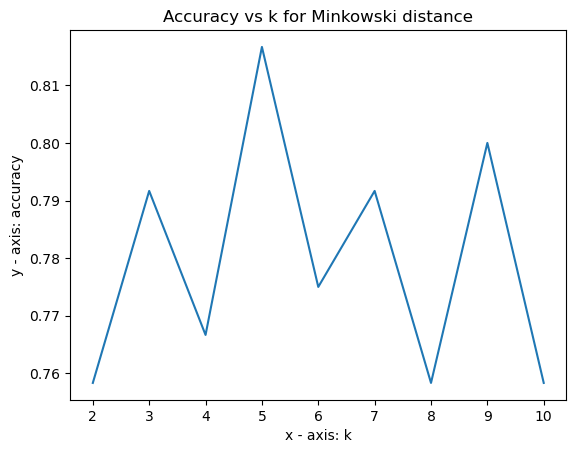

In [19]:
import matplotlib.pyplot as plt
y_axis_1 = [accuracy_1_2, accuracy_1_3, accuracy_1_4, accuracy_1_5, accuracy_1_6, accuracy_1_7, accuracy_1_8, accuracy_1_9, accuracy_1_10]
x_axis = np.arange(2,11)
    
# plotting the points  
plt.plot(x_axis, y_axis_1) 
    
# naming the x axis 
plt.xlabel('x - axis: k') 
# naming the y axis 
plt.ylabel('y - axis: accuracy') 
    
# giving a title to my graph 
plt.title('Accuracy vs k for Minkowski distance') 
    
# function to show the plot 
plt.show() 

Question 5.3: What happened to the accuracy of the classifier at k>9 and why?

Accuracy decreased due to overfitting

Question 6.1: Now try eliminating one of the features (Eender) from the dataset

In [20]:
SNA.drop('Gender', axis=1, inplace=True)
display(SNA.head())

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Question 6.2: Perform the same task from question 5.2 with the updated data

In [21]:
X_2 = SNA.iloc[:, 0:2]
y_2 = SNA.iloc[:, 2]

X_train_2, X_test_2, y_train_2, y_test_2 = split_data(X_2, y_2)

In [22]:
model_2_2, _, accuracy_2_2 = k_neighbor_classifier_utility(n=2, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_2_3, _, accuracy_2_3 = k_neighbor_classifier_utility(n=3, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_2_4, _, accuracy_2_4 = k_neighbor_classifier_utility(n=4, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_2_5, _, accuracy_2_5 = k_neighbor_classifier_utility(n=5, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_2_6, _, accuracy_2_6 = k_neighbor_classifier_utility(n=6, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_2_7, _, accuracy_2_7 = k_neighbor_classifier_utility(n=7, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_2_8, _, accuracy_2_8 = k_neighbor_classifier_utility(n=8, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_2_9, _, accuracy_2_9 = k_neighbor_classifier_utility(n=9, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_2_10, _, accuracy_2_10 = k_neighbor_classifier_utility(n=10, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Question 6.3: What happened to the results? What's your conclusion? Plot accuracy vs k.

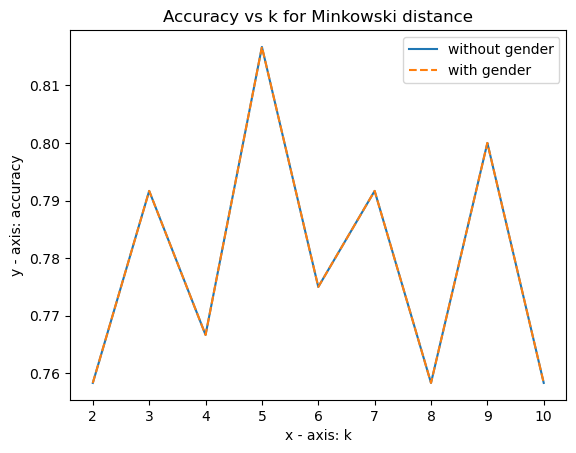

In [23]:
y_axis_2 = [accuracy_2_2, accuracy_2_3, accuracy_2_4, accuracy_2_5, accuracy_2_6, accuracy_2_7, accuracy_2_8, accuracy_2_9, accuracy_2_10]
    
# plotting the points  
plt.plot(x_axis, y_axis_2, label = "without gender", linestyle="-")
plt.plot(x_axis, y_axis_1, label = "with gender", linestyle="--")
    
# naming the x axis 
plt.xlabel('x - axis: k') 
# naming the y axis 
plt.ylabel('y - axis: accuracy')
plt.legend(loc='best')
    
# giving a title to my graph 
plt.title('Accuracy vs k for Minkowski distance') 
    
# function to show the plot 
plt.show() 

In [ ]:
print('CONCLUSION: Gender does not affect y label/purchase')

Question 7: Repeat steps 6.1-6.3 with another distance metric. Comment on what happens to the results?

In [24]:
metric = 'hamming'
model_2_hamming, _, accuracy_2_hamming = k_neighbor_classifier_utility(n=2, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_3_hamming, _, accuracy_3_hamming = k_neighbor_classifier_utility(n=3, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_4_hamming, _, accuracy_4_hamming = k_neighbor_classifier_utility(n=4, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_5_hamming, _, accuracy_5_hamming = k_neighbor_classifier_utility(n=5, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_6_hamming, _, accuracy_6_hamming = k_neighbor_classifier_utility(n=6, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_7_hamming, _, accuracy_7_hamming = k_neighbor_classifier_utility(n=7, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_8_hamming, _, accuracy_8_hamming = k_neighbor_classifier_utility(n=8, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_9_hamming, _, accuracy_9_hamming = k_neighbor_classifier_utility(n=9, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_10_hamming, _, accuracy_10_hamming = k_neighbor_classifier_utility(n=10, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

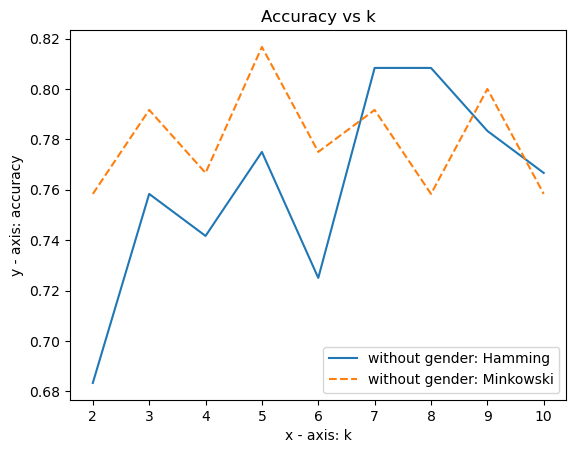

In [25]:
y_axis_3 = [accuracy_2_hamming, accuracy_3_hamming, accuracy_4_hamming, accuracy_5_hamming, accuracy_6_hamming, accuracy_7_hamming, accuracy_8_hamming, accuracy_9_hamming, accuracy_10_hamming]
    
# plotting the points  
plt.plot(x_axis, y_axis_3, label='without gender: Hamming', linestyle="-")
plt.plot(x_axis, y_axis_2, label='without gender: Minkowski', linestyle="--")
    
# naming the x axis 
plt.xlabel('x - axis: k') 
# naming the y axis 
plt.ylabel('y - axis: accuracy') 
    
# giving a title to my graph 
plt.title('Accuracy vs k') 
plt.legend(loc='best')
    
# function to show the plot 
plt.show() 

In [26]:
metric = 'cityblock'
model_2_man, _, accuracy_2_man = k_neighbor_classifier_utility(n=2, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_3_man, _, accuracy_3_man = k_neighbor_classifier_utility(n=3, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_4_man, _, accuracy_4_man = k_neighbor_classifier_utility(n=4, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_5_man, _, accuracy_5_man = k_neighbor_classifier_utility(n=5, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_6_man, _, accuracy_6_man = k_neighbor_classifier_utility(n=6, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_7_man, _, accuracy_7_man = k_neighbor_classifier_utility(n=7, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_8_man, _, accuracy_8_man = k_neighbor_classifier_utility(n=8, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_9_man, _, accuracy_9_man = k_neighbor_classifier_utility(n=9, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_10_man, _, accuracy_10_man = k_neighbor_classifier_utility(n=10, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

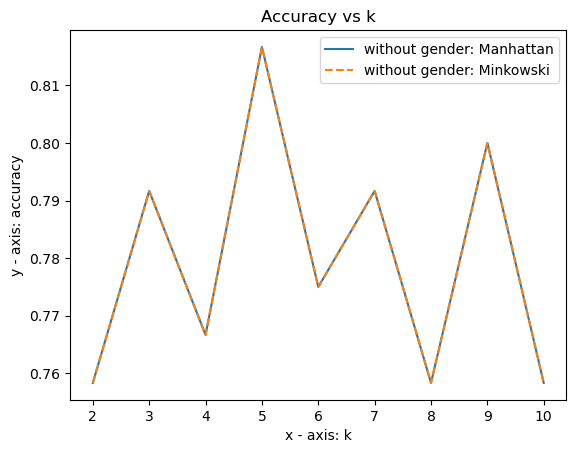

In [27]:
import matplotlib.pyplot as plt
y_axis_4 = [accuracy_2_man, accuracy_3_man, accuracy_4_man, accuracy_5_man, accuracy_6_man, accuracy_7_man, accuracy_8_man, accuracy_9_man, accuracy_10_man]
    
# plotting the points  
plt.plot(x_axis, y_axis_4, label = "without gender: Manhattan", linestyle="-")
plt.plot(x_axis, y_axis_2, label = "without gender: Minkowski", linestyle="--")
    
# naming the x axis 
plt.xlabel('x - axis: k') 
# naming the y axis 
plt.ylabel('y - axis: accuracy') 
    
# giving a title to my graph 
plt.title('Accuracy vs k')
plt.legend(loc='best')
    
# function to show the plot 
plt.show() 

In [28]:
metric = 'euclidean'
model_2_eu, _, accuracy_2_eu = k_neighbor_classifier_utility(n=2, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_3_eu, _, accuracy_3_eu = k_neighbor_classifier_utility(n=3, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_4_eu, _, accuracy_4_eu = k_neighbor_classifier_utility(n=4, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_5_eu, _, accuracy_5_eu = k_neighbor_classifier_utility(n=5, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_6_eu, _, accuracy_6_eu = k_neighbor_classifier_utility(n=6, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_7_eu, _, accuracy_7_eu = k_neighbor_classifier_utility(n=7, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_8_eu, _, accuracy_8_eu = k_neighbor_classifier_utility(n=8, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_9_eu, _, accuracy_9_eu = k_neighbor_classifier_utility(n=9, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)
model_10_eu, _, accuracy_10_eu = k_neighbor_classifier_utility(n=10, metric=metric, X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

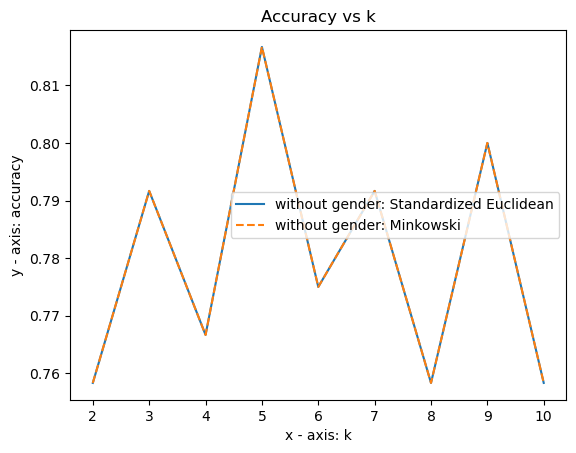

In [29]:
import matplotlib.pyplot as plt
y_axis_5 = [accuracy_2_eu, accuracy_3_eu, accuracy_4_eu, accuracy_5_eu, accuracy_6_eu, accuracy_7_eu, accuracy_8_eu, accuracy_9_eu, accuracy_10_eu]
    
# plotting the points  
plt.plot(x_axis, y_axis_5, label = "without gender: Euclidean", linestyle="-")
plt.plot(x_axis, y_axis_2, label = "without gender: Minkowski", linestyle="--")
    
# naming the x axis 
plt.xlabel('x - axis: k') 
# naming the y axis 
plt.ylabel('y - axis: accuracy') 
    
# giving a title to my graph 
plt.title('Accuracy vs k')
plt.legend(loc='best')
    
# function to show the plot 
plt.show() 